In [8]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,roc_auc_score,roc_curve
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
#import Scikitplot as skl
#sns.set()

In [9]:
#lets read the csv file
data=pd.read_csv(r"C:\Users\INPshy\Desktop\DATA Science\mushrooms.csv")
data.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [10]:
#describe the data 
data.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


so no Nan values ,and target variable(class) have only 2 unique value i.e. e & p, so we can convert into digit with encoding as object cant read by ML

In [11]:
data.isnull().sum()  #so no nan values 

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

so all column have object variable and no null values 

In [13]:
data.shape  #so there are 23 column dataset having 8124 rows

(8124, 23)

so total 23 column all are object so we have to convert these column into numerical value before that lets check unique value in data set

In [14]:
for i in data.columns:
    print('unique value in' ,i ,'are',data[i].unique())

unique value in class are ['p' 'e']
unique value in cap-shape are ['x' 'b' 's' 'f' 'k' 'c']
unique value in cap-surface are ['s' 'y' 'f' 'g']
unique value in cap-color are ['n' 'y' 'w' 'g' 'e' 'p' 'b' 'u' 'c' 'r']
unique value in bruises are ['t' 'f']
unique value in odor are ['p' 'a' 'l' 'n' 'f' 'c' 'y' 's' 'm']
unique value in gill-attachment are ['f' 'a']
unique value in gill-spacing are ['c' 'w']
unique value in gill-size are ['n' 'b']
unique value in gill-color are ['k' 'n' 'g' 'p' 'w' 'h' 'u' 'e' 'b' 'r' 'y' 'o']
unique value in stalk-shape are ['e' 't']
unique value in stalk-root are ['e' 'c' 'b' 'r' '?']
unique value in stalk-surface-above-ring are ['s' 'f' 'k' 'y']
unique value in stalk-surface-below-ring are ['s' 'f' 'y' 'k']
unique value in stalk-color-above-ring are ['w' 'g' 'p' 'n' 'b' 'e' 'o' 'c' 'y']
unique value in stalk-color-below-ring are ['w' 'p' 'g' 'b' 'n' 'e' 'y' 'o' 'c']
unique value in veil-type are ['p']
unique value in veil-color are ['w' 'n' 'o' 'y']
unique 

so mushrooms class is 2 type 1. poisonous ,2. edible rest are features of mushroom ,based on fatures mushrooms can calssified in poisonous class and edible class

In [15]:
from sklearn.preprocessing import LabelEncoder,OrdinalEncoder, OneHotEncoder

In [16]:
le=LabelEncoder()     #change all categorical variable in numerics (continous variable)

In [17]:
for i in data.columns:
    if data[i].dtype=="object":
        data[i]=le.fit_transform(data[i])

In [18]:
data

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,7,7,0,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,7,7,0,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,7,7,0,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,7,7,0,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,7,7,0,2,1,0,3,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,0,3,2,4,0,5,0,0,0,11,...,2,5,5,0,1,1,4,0,1,2
8120,0,5,2,4,0,5,0,0,0,11,...,2,5,5,0,0,1,4,0,4,2
8121,0,2,2,4,0,5,0,0,0,5,...,2,5,5,0,1,1,4,0,1,2
8122,1,3,3,4,0,8,1,0,1,0,...,1,7,7,0,2,1,0,7,4,2


so here make a note that p=1, e=0 (p=poisonous,e=ediable)

In [19]:
data.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,...,8124.000000,8124.000000,8124.000000,8124.0,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000
mean,0.482029,3.348104,1.827671,4.504677,0.415559,4.144756,0.974151,0.161497,0.309207,4.810684,...,1.603644,5.816347,5.794682,0.0,1.965534,1.069424,2.291974,3.596750,3.644018,1.508616
std,0.499708,1.604329,1.229873,2.545821,0.492848,2.103729,0.158695,0.368011,0.462195,3.540359,...,0.675974,1.901747,1.907291,0.0,0.242669,0.271064,1.801672,2.382663,1.252082,1.719975
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,0.000000,3.000000,0.000000,2.000000,1.000000,0.000000,0.000000,2.000000,...,1.000000,6.000000,6.000000,0.0,2.000000,1.000000,0.000000,2.000000,3.000000,0.000000
50%,0.000000,3.000000,2.000000,4.000000,0.000000,5.000000,1.000000,0.000000,0.000000,5.000000,...,2.000000,7.000000,7.000000,0.0,2.000000,1.000000,2.000000,3.000000,4.000000,1.000000
75%,1.000000,5.000000,3.000000,8.000000,1.000000,5.000000,1.000000,0.000000,1.000000,7.000000,...,2.000000,7.000000,7.000000,0.0,2.000000,1.000000,4.000000,7.000000,4.000000,2.000000
max,1.000000,5.000000,3.000000,9.000000,1.000000,8.000000,1.000000,1.000000,1.000000,11.000000,...,3.000000,8.000000,8.000000,0.0,3.000000,2.000000,4.000000,8.000000,5.000000,6.000000


<AxesSubplot:xlabel='class', ylabel='count'>

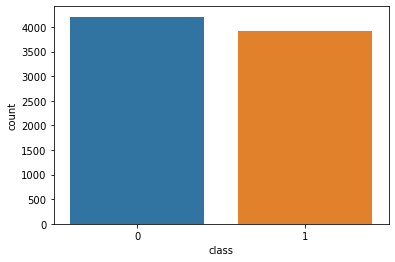

In [13]:
#check distribution of target variable
sns.countplot(x='class',data=data)

so our target variable dataset is balanced no requirement to do sampling 

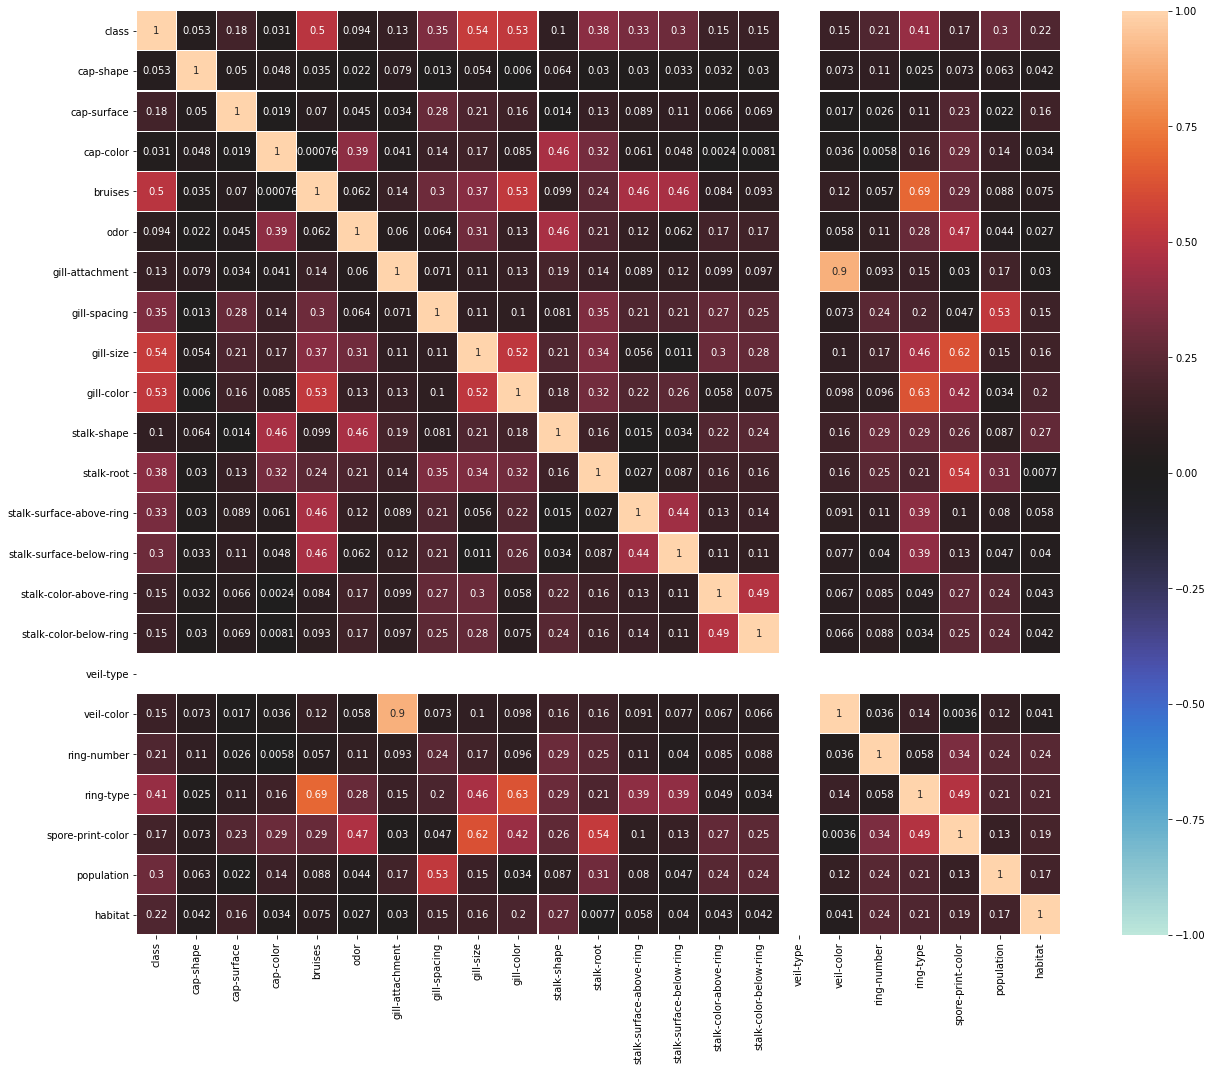

In [20]:
#lets see Plotting Heatmap(Correlation matrix) to check multicollinearity
df_corr=data.corr().abs()
plt.figure(figsize=(22,17))
sns.heatmap(df_corr,vmin=-1,vmax=1,annot=True,square=True,center=0,fmt='.2g',linewidths=0.1)
plt.show()

In [21]:
corr_matrix=data.corr()
corr_matrix['class'].sort_values(ascending=False)

class                       1.000000
gill-size                   0.540024
population                  0.298686
habitat                     0.217179
cap-surface                 0.178446
spore-print-color           0.171961
veil-color                  0.145142
gill-attachment             0.129200
cap-shape                   0.052951
cap-color                  -0.031384
odor                       -0.093552
stalk-shape                -0.102019
stalk-color-below-ring     -0.146730
stalk-color-above-ring     -0.154003
ring-number                -0.214366
stalk-surface-below-ring   -0.298801
stalk-surface-above-ring   -0.334593
gill-spacing               -0.348387
stalk-root                 -0.379361
ring-type                  -0.411771
bruises                    -0.501530
gill-color                 -0.530566
veil-type                        NaN
Name: class, dtype: float64

so there is no multicollinarity issue as value 

In [22]:
#check unique vale present in our dataset 
for i in data.columns:
    
    print('unique value in',i,'are' ,data[i].unique())

unique value in class are [1 0]
unique value in cap-shape are [5 0 4 2 3 1]
unique value in cap-surface are [2 3 0 1]
unique value in cap-color are [4 9 8 3 2 5 0 7 1 6]
unique value in bruises are [1 0]
unique value in odor are [6 0 3 5 2 1 8 7 4]
unique value in gill-attachment are [1 0]
unique value in gill-spacing are [0 1]
unique value in gill-size are [1 0]
unique value in gill-color are [ 4  5  2  7 10  3  9  1  0  8 11  6]
unique value in stalk-shape are [0 1]
unique value in stalk-root are [3 2 1 4 0]
unique value in stalk-surface-above-ring are [2 0 1 3]
unique value in stalk-surface-below-ring are [2 0 3 1]
unique value in stalk-color-above-ring are [7 3 6 4 0 2 5 1 8]
unique value in stalk-color-below-ring are [7 6 3 0 4 2 8 5 1]
unique value in veil-type are [0]
unique value in veil-color are [2 0 1 3]
unique value in ring-number are [1 2 0]
unique value in ring-type are [4 0 2 1 3]
unique value in spore-print-color are [2 3 6 1 7 5 4 8 0]
unique value in population are [3

In [23]:
#divide data into features(x) and label(y)
y=data['class']
x=data.drop(['class'],axis=1)

In [24]:
x #print features column

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,5,2,4,1,6,1,0,1,4,0,...,2,7,7,0,2,1,4,2,3,5
1,5,2,9,1,0,1,0,0,4,0,...,2,7,7,0,2,1,4,3,2,1
2,0,2,8,1,3,1,0,0,5,0,...,2,7,7,0,2,1,4,3,2,3
3,5,3,8,1,6,1,0,1,5,0,...,2,7,7,0,2,1,4,2,3,5
4,5,2,3,0,5,1,1,0,4,1,...,2,7,7,0,2,1,0,3,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,3,2,4,0,5,0,0,0,11,0,...,2,5,5,0,1,1,4,0,1,2
8120,5,2,4,0,5,0,0,0,11,0,...,2,5,5,0,0,1,4,0,4,2
8121,2,2,4,0,5,0,0,0,5,0,...,2,5,5,0,1,1,4,0,1,2
8122,3,3,4,0,8,1,0,1,0,1,...,1,7,7,0,2,1,0,7,4,2


In [25]:
y #print label column

0       1
1       0
2       0
3       1
4       0
       ..
8119    0
8120    0
8121    0
8122    1
8123    0
Name: class, Length: 8124, dtype: int32

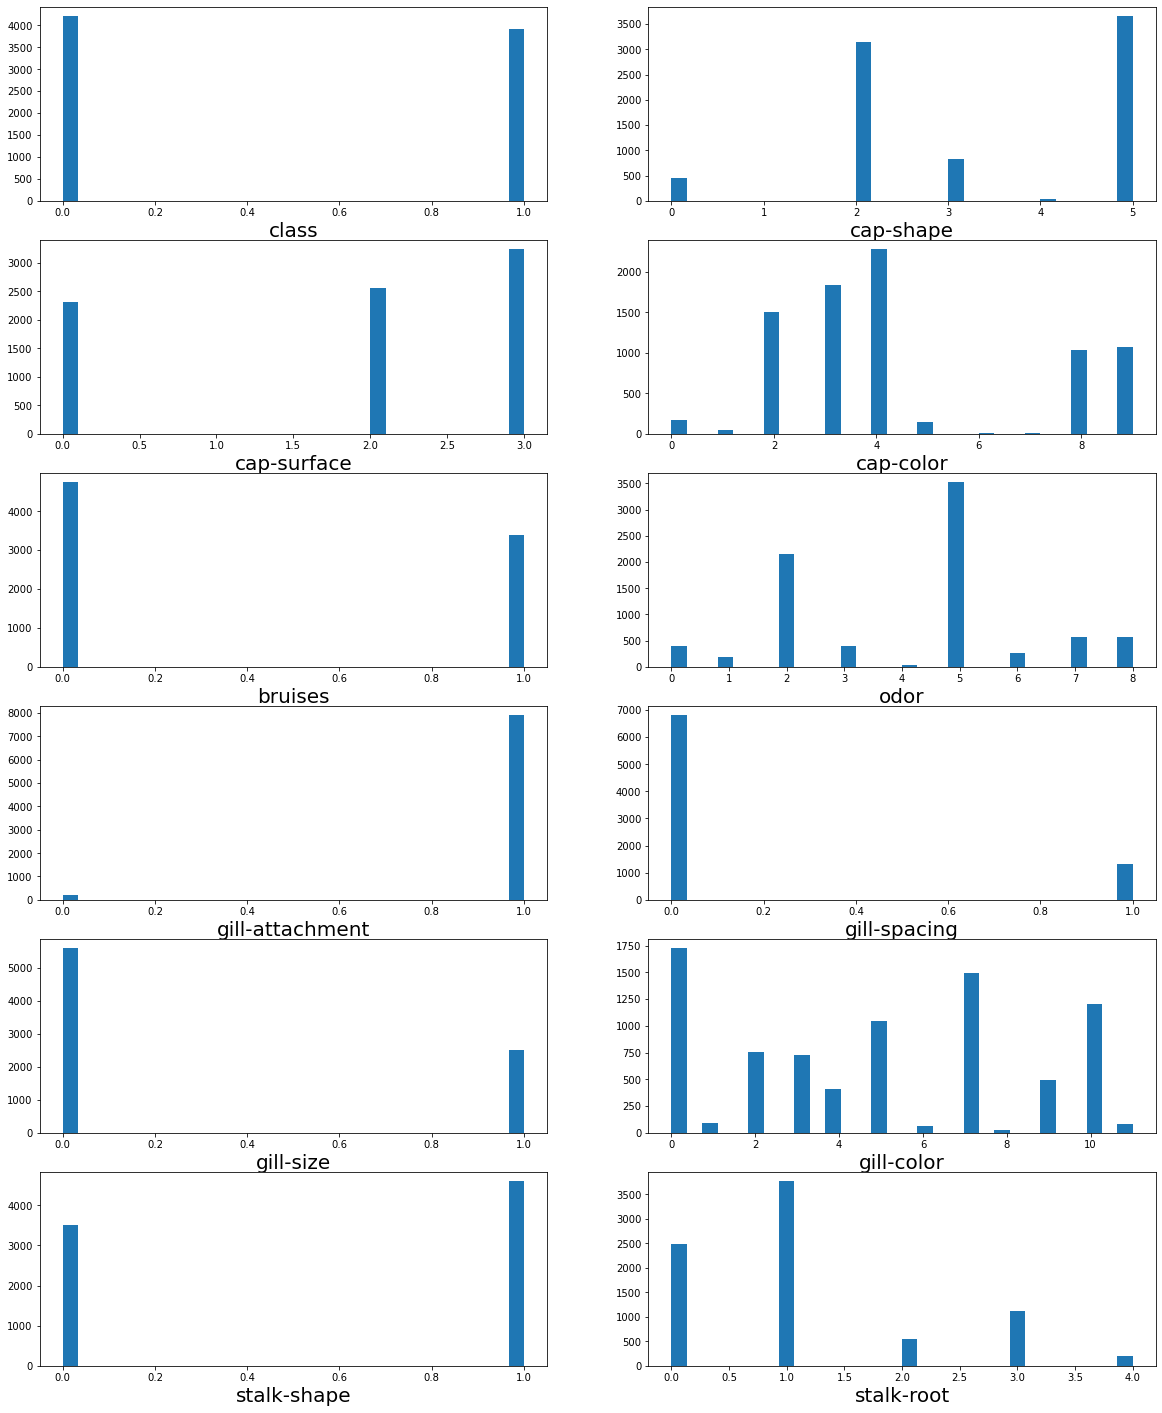

In [26]:
plt.figure(figsize=(20,25))
plotnumber=1
for column in data:
    if plotnumber<=12:
        ax=plt.subplot(6,2,plotnumber)
        plt.hist(data[column],bins=30)
        plt.xlabel(column,fontsize=20)
        plotnumber+=1  

in this dataset each features have role that categories our mushroom is piosnous or eidble we cant drop any single data in each column so lets begin building our model and see classification report and model accuracy, since my dataset have categorical so i havnt worry about outliers ,this is applicable for continous dataset

Feature Scaling 

In [27]:
#feature scaling  
scaler=MinMaxScaler()
x_scaler=scaler.fit_transform(x)

TRain Test Split 

In [28]:
#train test split the model now
x_train,x_test,y_train,y_test=train_test_split(x_scaler,y,test_size=.20,random_state=20)

In [29]:
from sklearn.ensemble import RandomForestClassifier

rfc=RandomForestClassifier()
rfc.fit(x_train,y_train)

RandomForestClassifier()

In [30]:
y_pred=rfc.predict(x_test)
y_pred

array([0, 1, 0, ..., 1, 1, 0])

In [31]:
rfc.score(x_test,y_test)

1.0

In [32]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       852
           1       1.00      1.00      1.00       773

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625



In [33]:
confusion_matrix(y_pred,y_test)

array([[852,   0],
       [  0, 773]], dtype=int64)

so my model is 100% accurate its have high possibilty of overfitting lets check crossvalidation

Cross Validation

In [34]:
from sklearn.model_selection import KFold,cross_val_score 


In [35]:
cross_val_score(RandomForestClassifier(),x_scaler,y,cv=5)

array([0.84246154, 1.        , 1.        , 1.        , 0.66933498])

In [36]:
cross_val_score(rfc,x_scaler,y,cv=5).mean()

0.8938617658203866

so on metrics its 10% variation model is slightly overfitted lets try with other method

In [37]:
from sklearn.neighbors import KNeighborsClassifier

In [38]:
knn=KNeighborsClassifier()
knn.fit(x_train,y_train)
y_pred=knn.predict(x_test)
y_pred

array([0, 1, 0, ..., 1, 1, 0])

In [39]:
cfm=confusion_matrix(y_pred,y_test)
cfm

array([[852,   0],
       [  0, 773]], dtype=int64)

In [40]:
print(classification_report(y_test,y_pred,digits=2))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       852
           1       1.00      1.00      1.00       773

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625



Crross validtaion of KNN model

In [41]:
cross_val_score(KNeighborsClassifier(),x_scaler,y,cv=7)

array([0.77950043, 1.        , 1.        , 0.98794143, 1.        ,
       1.        , 0.5387931 ])

In [42]:
cross_val_score(knn,x_scaler,y,cv=7).mean()

0.9008907091304845

so score is .90 means model is slightly over fitted lets try with logistic regression

In [43]:
from sklearn.linear_model import LogisticRegression

In [44]:
log_reg=LogisticRegression()
log_reg.fit(x_train,y_train)

LogisticRegression()

In [45]:
y_pred=log_reg.predict(x_test)

In [46]:
accuracy=accuracy_score(y_pred,y_test)
accuracy

0.9495384615384616

In [47]:
conf_mat=confusion_matrix(y_test,y_pred)
conf_mat

array([[822,  30],
       [ 52, 721]], dtype=int64)

so here 30 false postive ,and 52 false negative 

In [48]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.94      0.96      0.95       852
           1       0.96      0.93      0.95       773

    accuracy                           0.95      1625
   macro avg       0.95      0.95      0.95      1625
weighted avg       0.95      0.95      0.95      1625



In [49]:
#cross Validation of model
cross_val_score(LogisticRegression(),x_scaler,y,cv=9)

array([0.68881506, 0.90586932, 0.98560354, 0.95570321, 0.8593577 ,
       0.95348837, 0.99889135, 0.66297118, 0.92239468])

In [50]:
cross_val_score(log_reg,x_scaler,y,cv=9).mean()

0.8814549350567502

In [51]:
from sklearn.tree import DecisionTreeClassifier

In [52]:
dt=DecisionTreeClassifier()
dt.fit(x_train,y_train)

DecisionTreeClassifier()

In [53]:
y_pred=dt.predict(x_test)

In [54]:
accuracy=accuracy_score(y_pred,y_test)
accuracy

1.0

In [55]:
conf_mat=confusion_matrix(y_test,y_pred)
conf_mat

array([[852,   0],
       [  0, 773]], dtype=int64)

model seems overfitted lets do cross validation

In [56]:
cross_val_score(DecisionTreeClassifier(),x_scaler,y,cv=5)

array([0.88184615, 1.        , 1.        , 1.        , 0.74876847])

In [57]:
cross_val_score(dt,x_scaler,y,cv=5).mean()

0.9256306176582039

so model is slightly overfitted

In [72]:
# Save the Modle to file in the current working directory
import pickle
Pkl_Filename = "Pickle_RL_Model.pkl"  

with open(Pkl_Filename, 'wb') as file:  
    pickle.dump(rfc, file)   #rfc=random forest model saving

In [74]:
# Load the Model back from file
with open(Pkl_Filename, 'rb') as file:  
    Pickled_RFC_Model = pickle.load(file)

Pickled_RFC_Model

RandomForestClassifier()